In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy import interpolate

In [12]:
def depth_bin(df,depth,attr,depth_inc,win):
    min_depth = df[depth].min()
    max_depth = df[depth].max()
    n_inc = (max_depth - min_depth)//depth_inc
    
    bin_mean = []
    bin_median = []
    bin_max = []
    bin_center = []
    bin_center_empty = []

    for i in np.arange(n_inc):
        min_temp= min_depth + ((i)*depth_inc)
        max_temp = min_temp + depth_inc
        df_temp = df[(df[depth]>min_temp) & (df[depth]<=max_temp)]
        bin_center = np.append(bin_center , max_temp - depth_inc/2)
        if df_temp.size ==0:
            bin_center_empty = np.append(bin_center_empty,max_temp-depth_inc/2)
            bin_mean = np.append(bin_mean,np.nan)
            bin_max = np.append(bin_max,bin_max[int(i-1)])
            bin_median = np.append(bin_median,np.nan)
        else:
            bin_mean = np.append(bin_mean,np.nanmean(df_temp[attr]))
            bin_max = np.append(bin_max , np.nanmax(df_temp[attr]))
            bin_median = np.append(bin_median,np.nanmedian(df_temp[attr]))
    
    df_binned_data = pd.DataFrame({'bin_center':bin_center})
    df_binned_data[attr+'bin_max']=bin_max
    df_binned_data[attr+'bin_max_win'] = df_binned_data[attr+'bin_max'].rolling(win).median()
    df_binned_data[attr+'bin_mean']=bin_mean
    df_binned_data[attr+'bin_mean_win'] = df_binned_data[attr+'bin_mean'].rolling(win).median()
    df_binned_data[attr+'bin_max'].fillna(df_binned_data[attr+'bin_max_win'])
    df_binned_data[attr+'bin_diff'] = df_binned_data[attr+'bin_max']-df_binned_data[attr+'bin_mean']
    df_binned_data[attr+'bin_median']=bin_median

    print(df_binned_data[attr+'bin_max'].isna().sum())

    return df_binned_data

In [8]:
path = '/Users/prathikprasad/Desktop/DataRepo Hook Load/12.25inch/'
df9= pd.read_csv(path+'BHA9(Sep18).csv')
df10= pd.read_csv(path+'BHA10(Sep19-Sep20).csv')
df11 = pd.read_csv(path+'BHA11(Sep21-Sep22).csv')
df12= pd.read_csv(path+'BHA12(Sep25-Sep29).csv')
df14= pd.read_csv(path+'BHA14(Oct1).csv')
df15= pd.read_csv(path+'BHA15(Oct2-Oct4).csv')
df16= pd.read_csv(path+'BHA16(Oct4-Oct5).csv')
df17= pd.read_csv(path+'BHA17(Oct7-Oct9).csv')
df18= pd.read_csv(path+'BHA18(Oct9).csv')
df19= pd.read_csv(path+'BHA19(Oct10).csv')
df20= pd.read_csv(path+'BHA20(Oct11-Oct13).csv')
df21=pd.read_csv(path+'BHA21(Oct13-Oct15).csv')
df22= pd.read_csv(path+'BHA22(Oct19-Oct20).csv')

BHAs = [df9,df10,df11,df12,df14,df15,df16,df17,df18,df19,df20,df21,df22]



# Creating a new Date Time Column
for df in BHAs:
    df["YYYY/MM/DD_HH:MM:SS"] = df["YYYY/MM/DD"] + " " + df["HH:MM:SS"]
    df["Date_Time"] = pd.to_datetime(df["YYYY/MM/DD_HH:MM:SS"], format="%Y-%m-%d %H:%M:%S")

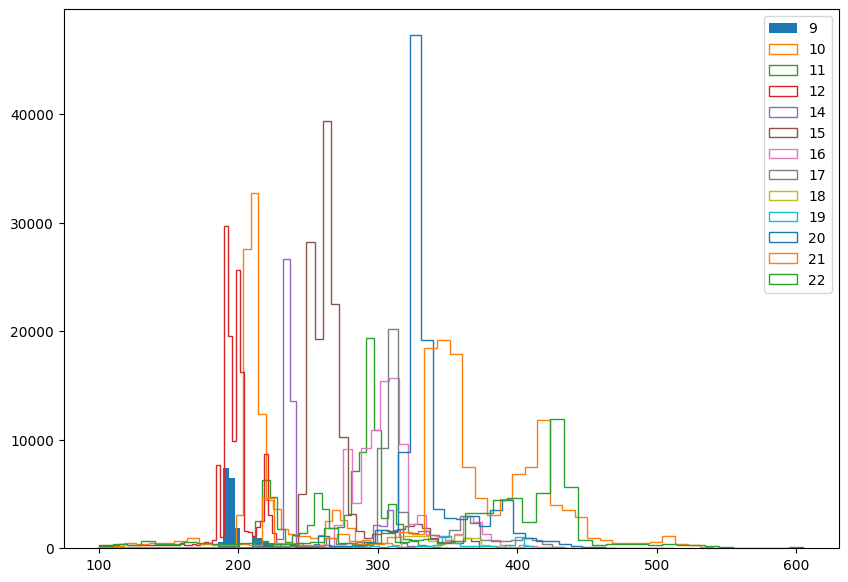

In [9]:
df_9_trip = df9[df9['Hook Load (klbs)']>100]
df_10_trip = df10[df10['Hook Load (klbs)']>100]
df_11_trip = df11[df11['Hook Load (klbs)']>100]
df_12_trip = df12[df12['Hook Load (klbs)']>100]
df_14_trip = df14[df14['Hook Load (klbs)']>100]
df_15_trip = df15[df15['Hook Load (klbs)']>100]
df_16_trip = df16[df16['Hook Load (klbs)']>100]
df_17_trip = df17[df17['Hook Load (klbs)']>100]
df_18_trip = df18[df18['Hook Load (klbs)']>100]
df_19_trip = df19[df19['Hook Load (klbs)']>100]
df_20_trip = df20[df20['Hook Load (klbs)']>100]
df_21_trip = df21[df21['Hook Load (klbs)']>100]
df_22_trip = df22[df22['Hook Load (klbs)']>100]



plt.hist(df_9_trip['Hook Load (klbs)'],50,label='9')
plt.hist(df_10_trip['Hook Load (klbs)'],50,histtype='step',label='10')
plt.hist(df_11_trip['Hook Load (klbs)'],50,histtype='step',label='11')
plt.hist(df_12_trip['Hook Load (klbs)'],50,histtype='step',label='12')
plt.hist(df_14_trip['Hook Load (klbs)'],50,histtype='step',label='14')
plt.hist(df_15_trip['Hook Load (klbs)'],50,histtype='step',label='15')
plt.hist(df_16_trip['Hook Load (klbs)'],50,histtype='step', label='16')
plt.hist(df_17_trip['Hook Load (klbs)'],50,histtype='step', label='17')
plt.hist(df_18_trip['Hook Load (klbs)'],50,histtype='step', label='18')
plt.hist(df_19_trip['Hook Load (klbs)'],50,histtype='step', label='19')
plt.hist(df_20_trip['Hook Load (klbs)'],50,histtype='step', label='20')
plt.hist(df_21_trip['Hook Load (klbs)'],50,histtype='step', label='21')
plt.hist(df_22_trip['Hook Load (klbs)'],50,histtype='step', label='22')
plt.legend()

plt.gcf().set_size_inches(10,7)
plt.show()


In [13]:
df_all_trip = (df_9_trip.append(df_10_trip).append(df_11_trip).append(df_12_trip).append(df_14_trip).append(df_15_trip).append(df_16_trip).append(df_17_trip).append(df_18_trip).append(df_19_trip).append(df_20_trip).append(df_21_trip).append(df_22_trip)).copy()

df_all_binned = depth_bin(df_all_trip,'Bit Depth (feet)','Hook Load (klbs)',25,25)

HL_fit = np.polyfit(df_all_binned['bin_center'],df_all_binned['Hook Load (klbs)bin_mean'],1)

depth_pred = np.linspace(1000,(df_22_trip['Bit Depth (feet)']).max(),100)

HL_lstsqr = np.polyval(HL_fit, depth_pred)

/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000gn/T/ipykernel_58489/4111463538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trip = (df_9_trip.append(df_10_trip).append(df_11_trip).append(df_12_trip).append(df_14_trip).append(df_15_trip).append(df_16_trip).append(df_17_trip).append(df_18_trip).append(df_19_trip).append(df_20_trip).append(df_21_trip).append(df_22_trip)).copy()
/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000gn/T/ipykernel_58489/4111463538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trip = (df_9_trip.append(df_10_trip).append(df_11_trip).append(df_12_trip).append(df_14_trip).append(df_15_trip).append(df_16_trip).append(df_17_trip).append(df_18_trip).append(df_19_trip).append(df_20_trip).append(df_21_trip).append(df_22_trip)).copy()
/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000

0


In [14]:
df_9_binned = depth_bin(df_9_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_10_binned = depth_bin(df_10_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_11_binned = depth_bin(df_11_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_12_binned = depth_bin(df_12_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_14_binned = depth_bin(df_14_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_15_binned = depth_bin(df_15_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
# df_16_binned = depth_bin(df_16_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_17_binned = depth_bin(df_17_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_18_binned = depth_bin(df_18_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_19_binned = depth_bin(df_19_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
# df_20_binned = depth_bin(df_20_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_21_binned = depth_bin(df_21_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
# df_22_binned = depth_bin(df_22_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)

0
0
0
0
0
0
0
0
0
0
